In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
# Check that TF version (2.1.0 - 2.3.2 should be fine)
print(tf.__version__)

2.3.0


# For turn-in move all answers to questions and requested plots to top of notebook or this will not be graded. Also make a final clean run of your code so the cells execute in order.

### Points awarded for correct working models, questions, and plots.

[+10 per model correct and working -5 for failure on either]

**1.1 Answer the following questions:**
1.   Explain the indication of overfitting and how this occurs (provide plot supporting your answer)? [+4 answer, +4 plot, +2 answer and plot agree]
     
     The in    


2.   Explain how overfit can hinder performance of a model when deployed. [+6 answer]

3.   Name two ways to avoid this. [+2 answer, +2 answer]

**1.2 Answer the following question:** 
 1.   Explain how dropout affected your loss (provide plot supporting your answer). [+5 answer, +5 plot]

**Bonus Answer the following question:**
    
  1. Considering that encoder and decoder can be constructed as separate components, trained as a single unit, and then separated for use . What uses can you brainstorm?  [+5 bonus makeup points]

**2.1 Linear AE points for constructed model, no questions here.**

**2.2 Convolutional AE points for constructed model, no questions here.**

**2.3 Report histogram plot, mean and std. dev. of normal data, and confusion matrix for 2 standard deviations as results. Discuss your loss plot.** [+10 for greater than 75 TP, +10 all else]

***Reminder: Achieve better than 75 anomalies***

In [ ]:
#Import dataset and normalize to [0,1]
fashion_mnist = tf.keras.datasets.mnist
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
print(np.shape(data_train))
print(np.shape(data_train))
#Normalize
data_train = tf.keras.utils.normalize(data_train, axis = -1, order = 2)
data_test = tf.keras.utils.normalize(data_test, axis = -1, order = 2)
print(np.shape(data_train))
print(np.shape(data_train))
#confirming scale of pixel values
print('Train min=%.3f, max=%.3f' % (data_train.min(), data_train.max()))
print('Test min=%.3f, max=%.3f' % (data_test.min(), data_test.max()))

#Reshape
data_train = data_train.reshape((data_train.shape[0], data_train.shape[1], data_train.shape[2], 1))
data_test = data_test.reshape((data_test.shape[0], data_train.shape[1], data_train.shape[2], 1))
print(np.shape(data_train))
print(np.shape(data_train))

#Create labels as one-hot vectors
labels_train = tf.keras.utils.to_categorical(labels_train, num_classes=10)
labels_test = tf.keras.utils.to_categorical(labels_test, num_classes=10)
print(np.shape(labels_train))
print(np.shape(labels_test))


# Section 1 - CNN's

Fill in the model:
* Input: 28x28x1 grayscale image (1 specifies single channel grayscale).
* 1st hidden: 2D convolutional layer with 256 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 128 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: Flatten layer to map 2D to 1D vector.
* 6th hidden: Dense layer of 100 perceptrons.
* 7th hidden: Dense layer of 100 perceptrons.
* Output: 10 perceptrons for classification.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br>  Train for 200 epochs**

## 1.1 Overfitting 

In [ ]:
print(data_train.shape)
pic1 = data_train[0,:,:,0]
#plt.imshow(pic1, cmap='gray')

In [ ]:
#Create and train model architecture
def CNN_overfit():
    #Reference: https://www.geeksforgeeks.org/how-to-normalize-center-and-standardize-image-pixels-in-keras/
    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    #### Fill in Model ####
    model = Sequential()
    #1st
    model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(data_train.shape[1], data_train.shape[2], 1)))
    #2nd
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Activation('relu'))
    #3rd
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    #4th
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Activation('relu'))
    #5th
    model.add(layers.Flatten())
    #6th
    model.add(layers.Dense(100, activation='relu'))
    #7th
    model.add(layers.Dense(100, activation='relu'))
    #Output
    model.add(layers.Dense(10, activation='softmax'))
    return model

#Compile and train the model
CNN_overfit = CNN_overfit()
CNN_overfit.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_overfit = CNN_overfit.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

In [ ]:
get_hl = K.function([CNN_overfit.layers[0].input], [CNN_overfit.layers[2].output])
deep_ae_hl = get_hl([data_test])[0]

In [ ]:
# Information contained in history dict.
print(history_overfit.history.keys())

In [ ]:
epoch = np.arange(200)+1

#Plot accuracy vs epoch
#### Fill in plot ####
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(epoch, history_overfit.history['accuracy'])
plt.plot(epoch, history_overfit.history['val_accuracy'])
plt.title('Accuracy vs epoch')
plt.legend(labels=['train', 'val'],  loc='lower right')

#Plot loss vs epoch
#### Fill in plot ####
plt.subplot(122)
plt.plot(epoch, history_overfit.history['loss'])
plt.plot(epoch, history_overfit.history['val_loss'])
plt.title('Loss vs epoch')
plt.legend(labels=['train', 'val'],  loc='upper right')


## 1.2 Improvements 

Using the network above, (1) insert a dropout of 30% between the input and first hidden layer. Run the model again and make note of the result. Next, (2 ) remove the dropout between input and hidden and add a dropout to each hidden layer except between softmax and output layer. Plot accuracy and loss only for (2). 

In [ ]:
#Create and train model architecture
def CNN_dropout_input():
    #Reference
    #### Fill in model ####
    model = Sequential()
    model.add(layers.Dropout(0.3, input_shape=(data_train.shape[1], data_train.shape[2], 1)))
    #1st
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    #2nd
    model.add(layers.MaxPooling2D((2, 2)))
    #model.add(layers.Activation('relu'))
    #3rd
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    #4th
    model.add(layers.MaxPooling2D((2, 2)))
    #model.add(layers.Activation('relu'))
    #5th
    model.add(layers.Flatten())
    #6th
    model.add(layers.Dense(100, activation='relu'))
    #7th
    model.add(layers.Dense(100, activation='relu'))
    #Output
    model.add(layers.Dense(10, activation='softmax'))
    return model

#Compile and train the model
CNN_dropout_input = CNN_dropout_input()
CNN_dropout_input.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout_input = CNN_dropout_input.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_input = CNN_dropout_input.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_input[1]*100))

In [ ]:
#Create and train model architecture
def CNN_dropout_hidden():
    
    #### Fill in model ####
    model = Sequential()
    #1st
    model.add(layers.Conv2D(256, (3, 3), activation='relu'), input_shape=(data_train.shape[1], data_train.shape[2], 1))
    model.add(layers.Dropout(0.3))
    #2nd
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Activation('relu'))
    #3rd
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Dropout(0.3))
    #4th
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Activation('relu'))
    #5th
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    #6th
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dropout(0.3))
    #7th
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dropout(0.3))
    #Output
    model.add(layers.Dense(10, activation='softmax'))
    return model

#Compile and train the model
CNN_dropout_hidden = CNN_dropout_hidden()
CNN_dropout_hidden.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout_hidden = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

In [ ]:
epoch = np.arange(200)+1

#Plot accuracy vs epoch
#### Fill in plot ####
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(epoch, history_dropout_hidden.history['accuracy'])
plt.plot(epoch, history_dropout_hidden.history['val_accuracy'])
plt.title('Accuracy vs epoch')
plt.legend(labels=['train', 'val'],  loc='lower right')

#Plot train/validatio loss vs epoch
#### Fill in plot ####
plt.subplot(122)
plt.plot(epoch, history_dropout_hidden.history['loss'])
plt.plot(epoch, history_dropout_hidden.history['val_loss'])
plt.title('Loss vs epoch')
plt.legend(labels=['train', 'val'],  loc='upper right')


# Section 2- Autoencoders

## 2.1 Linear AE 

Fill in the model:
* Input: Flattened grayscale image to 28^2 = 784-dimensional vector.
* 1st hidden: 400 perceptrons.
* 2nd hidden: 200 perceptrons.
* 3rd hidden: 100 perceptrons.
* 4th hidden: 200 perceptrons.
* 5th hidden: 400 perceptrons.
* Output: 784 perceptrons.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br> Train for 150 epochs**

In [ ]:
#Reshape training and testing data
data_train_reshape_fcae = data_train.reshape((data_train.shape[0], data_train.shape[1]*data_train.shape[2]))
data_test_reshape_fcae = data_test.reshape((data_test.shape[0], data_train.shape[1]*data_train.shape[2]))
#print(np.shape(data_train_reshape_fcae))
#print(np.shape(data_test_reshape_fcae))
#data_train_reshape_fcae = data_train.reshape((data_train.shape[0], data_train.shape[1], data_train.shape[2]))
#data_test_reshape_fcae = data_test.reshape((data_test.shape[0], data_train.shape[1], data_train.shape[2]))
#data_train_reshape_fcae = data_train.reshape((len(data_train), np.prod(data_train.shape[1:])))
#data_test_reshape_fcae = data_test.reshape((len(data_test), np.prod(data_test.shape[1:])))
print(np.shape(data_train_reshape_fcae))
print(np.shape(data_test_reshape_fcae))
print(data_train_reshape_fcae.shape[1])

In [ ]:
# Create autoencoder architecture

def deep_ae():
    model = Sequential()
    # Encoder    
    #### Fill in the model ####
    #model.add(layers.Flatten())#
    model.add(layers.Dense(400, activation='relu',input_shape=(data_train_reshape_fcae.shape[1],)))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(100, activation='relu'))
    
    # Decoder
    #### Fill in the model ####
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(400, activation='relu'))
    model.add(layers.Dense(784, activation='sigmoid'))#'relu'
    #model.add(layers.Reshape((28, 28))
  
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
deep_ae = deep_ae()#
from tensorflow.keras import layers, losses
deep_ae.compile(loss = 'mean_squared_error' , optimizer = 'adam')#
history_deep_ae = deep_ae.fit(data_train_reshape_fcae, data_train_reshape_fcae, validation_data=(data_test_reshape_fcae, data_test_reshape_fcae), epochs=150, batch_size=250, shuffle=True)
decoded_data = deep_ae.predict(data_test_reshape_fcae)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output])
deep_ae_hl = get_hl([data_test_reshape_fcae])[0]


In [ ]:
print(np.shape(get_hl([data_test_reshape_fcae])))
print(deep_ae_hl)
print(np.shape(deep_ae_hl))
#Plot train/validatio loss vs epoch
#### Fill in plot ####
epoch = np.arange(150)+1
plt.figure(figsize=(16,8))
plt.plot(epoch, history_deep_ae.history['loss'])
plt.plot(epoch, history_deep_ae.history['val_loss'])
plt.title('Loss vs epoch')
plt.legend(labels=['train', 'val'],  loc='upper right')

In [ ]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_fcae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.2 Convolutional AE 

Fill in the model:
* Input: 28x28x1 grayscale image.
* 1st hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 6th hidden: A 2x2 upsample layer.
* 7th hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 8th hidden: A 2x2 upsample layer.
* Output: A convolutional layer with a single feature map and 3x3 filters.
<br>**Activations, dropout placement, bias , loss function, and optimizer are your choice.
<br>  Set the dropout rate at 30% if the dropout layer is used (optional, not required).
<br>  Train for 200 epochs**

In [ ]:
#Reshape data to account for grayscale channel in each image
data_train_reshape_cae = data_train.reshape((data_train.shape[0], data_train.shape[1], data_train.shape[2],1))
data_test_reshape_cae = data_test.reshape((data_test.shape[0], data_train.shape[1], data_train.shape[2],1))
print(np.shape(data_train_reshape_cae))
print(np.shape(data_test_reshape_cae))

In [ ]:
#Create Convolutional AutoEncoder Architecture
def cae():
    #Encoder
    #### Fill in model ####  
    model = Sequential()
    #model.add(layers.Dropout(0.3))#, input_shape=(data_train.shape[1], data_train.shape[2])
    #1st
    model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same', input_shape=(data_test_reshape_cae.shape[1], data_test_reshape_cae.shape[2], 1)))
    #2nd
    model.add(layers.MaxPooling2D((2, 2)))
    #model.add(layers.Activation('relu'))
    #3rd
    model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
    #4th
    model.add(layers.MaxPooling2D((2, 2)))
    #model.add(layers.Activation('relu'))
    #Decoder 
    #### Fill in model ####
    #5th
    model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
    #6th
    model.add(layers.UpSampling2D((2, 2)))
    #7th
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
    #8th
    model.add(layers.UpSampling2D((2, 2)))
    #Output
    model.add(layers.Conv2D(1, (3, 3), activation='relu', padding='same'))        
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
conv_ae = cae()
#print(conv_ae.summary())
conv_ae.compile(loss = 'mean_squared_error' , optimizer = 'adam')
history_conv_ae = conv_ae.fit(data_train_reshape_cae, data_train_reshape_cae, validation_data=(data_test_reshape_cae, data_test_reshape_cae), epochs=200, batch_size=250, shuffle=True)
decoded_data = conv_ae.predict(data_test_reshape_cae)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
conv_ae_hl = get_hl([data_test_reshape_cae])[0]

In [ ]:
#Plot train/validation loss vs epoch
#### Fill in plot ####
epoch = np.arange(200)+1
plt.figure(figsize=(16,8))
plt.plot(epoch, history_conv_ae.history['loss'])
plt.plot(epoch, history_conv_ae.history['val_loss'])
plt.title('Loss vs epoch')
plt.legend(labels=['train', 'val'],  loc='upper right')

In [ ]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_cae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(conv_ae_hl[i].reshape(28, 14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.3 Machine Anomaly Detection

Using the dataset provided **create the autoencdoer model** you deem necessary to achieve better than 75 true positives (TP = 75) where a true instance is an anomaly.
Or detect all 143 if you can! Although anomaly 
detection thresholds can be set arbitrarily and various metrics
are used depending on the problem, we will set ours at 2 
standard deviations from the mean of "normal" data to judge TP's. Use the code provided at the bottom for calculating true positives and histogramming. 

In [3]:
#### Restart your kernal and run from here to clear some memory
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
tf.keras.backend.set_floatx('float64')

import sys
from os import listdir
from os.path import isfile, join

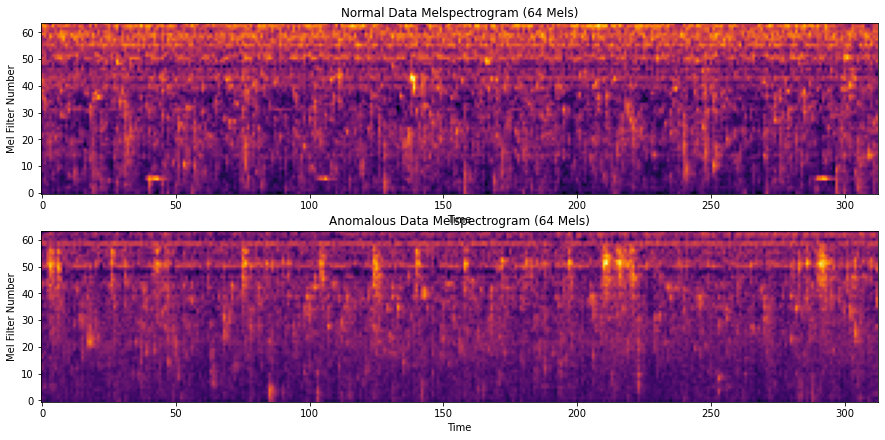

In [4]:
#### Load melspectrograms
ex_norm  = np.load('./ex_normalspec.npy')
ex_anom = np.load('./ex_abnormspec.npy')

plt.figure(figsize=(15,7))
plt.subplot(211)
plt.imshow(ex_norm[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Normal Data Melspectrogram (64 Mels)') 

plt.subplot(212)
plt.imshow(ex_anom[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Anomalous Data Melspectrogram (64 Mels)') 
plt.show()

In [5]:
# Create your own Baseline autoencoder
# Model name is fixed for use by later code
from tensorflow.keras import layers
autoencoderBASE = tf.keras.models.Sequential([
    #### Fill in your model #####，
    #Encoder
    layers.Conv2D(16, (3, 3), activation='relu',padding='same'),#, input_shape=(256,626,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),    
    # Decoder
    #### Fill in the model ####
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation='relu', padding='same'),
])

In [6]:
# Load data
normal_data  = np.load('./training_data.npy')
anomaly_data = np.load('./test_data.npy')
print(np.shape(normal_data))
print(np.shape(anomaly_data))
normal_data_reshape1 = normal_data[:,:,:,0:-1]
anomaly_data_reshape1 = anomaly_data[:,:,:,0:-1]
print(np.shape(normal_data_reshape1))
print(np.shape(anomaly_data_reshape1))
dim1 = normal_data_reshape1.shape[1] * normal_data_reshape1.shape[2] * normal_data_reshape1.shape[3]
normal_data_scale = normal_data_reshape1.reshape(normal_data_reshape1.shape[0], dim1)
anomaly_data_scale = anomaly_data_reshape1.reshape(anomaly_data_reshape1.shape[0], dim1)
scaler = MinMaxScaler()
normal_data_scale = scaler.fit_transform(normal_data_scale)
anomaly_data_scale = scaler.fit_transform(anomaly_data_scale)
print('Train min=%.3f, max=%.3f' % (normal_data_scale.min(), normal_data_scale.max()))
print('Test min=%.3f, max=%.3f' % (anomaly_data_scale.min(), anomaly_data_scale.max()))
normal_data_reshape2 = normal_data_scale.reshape(1000,512,312,1)
anomaly_data_reshape2 = anomaly_data_scale.reshape(143,512,312,1)
print(np.shape(normal_data_reshape2))
print(np.shape(anomaly_data_reshape2))


(1000, 8, 64, 313)
(143, 8, 64, 313)
(1000, 8, 64, 312)
(143, 8, 64, 312)
Train min=0.000, max=1.000
Test min=0.000, max=1.000
(1000, 512, 312, 1)
(143, 512, 312, 1)


In [ ]:
#### General steps to follow
# Set up the data (reshape, scale, etc...


# Initialize a loss function
x_train, x_valid = train_test_split(normal_data_reshape2, test_size=0.3)
# Compile a model
autoencoderBASE.compile(loss = 'mean_squared_error' , optimizer = 'adam', metrics=['accuracy'])
# Train a model
autoencoderBASE_history = autoencoderBASE.fit(x_train, x_train, validation_data=(x_valid, x_valid), epochs=20, batch_size=250, shuffle=True)

Epoch 1/20


In [ ]:
# Plot loss versus epoch.
#Plot train/validation loss vs epoch
#### Fill in plot ####
epoch = np.arange(100)+1
plt.figure(figsize=(16,8))
plt.plot(epoch, history_ae.history['loss'])
plt.plot(epoch, history_ae.history['val_loss'])
plt.title('Loss vs epoch')
plt.legend(labels=['train', 'val'],  loc='upper right')

In [ ]:
x_train = []
x_train = anomaly_data_reshape

In [ ]:
######### This code should remain untouched or autograder will 
######### give zero points.
#### Feed your data through to get mean and std
#### If you did not use a validation set then only use
#### your training data. Concatenating is therefore un-needed.
loss_list = []
# Combine train and validation data and get MSE's
dataset = (tf.data.Dataset.from_tensor_slices(np.concatenate((x_train,x_valid))))
for i, batch in dataset.enumerate():
    ae_predictions = autoencoderBASE(batch).numpy()
    loss_list.append(lossMSE(batch, ae_predictions).numpy())
# Feed the anomaly data through to get its MSE's
anom_list = []
anomset = (tf.data.Dataset.from_tensor_slices(test))
for i, batch in anomset.enumerate():
    ae_predictions = autoencoderBASE(batch).numpy()
    anom_list.append(lossMSE(batch, ae_predictions).numpy())
    
normal_data_MSEs = np.array(loss_list)
abnormal_data_MSEs = np.array(anom_list)
######## Code for presenting answer to Question 2.3 ################## 
threshold = 2.0
mean = normal_data_MSEs.mean()
std = normal_data_MSEs.std()
print(f'The mean of normal data is {mean:.4f}\
        and standard deviation is {std:.4f}')
upperbound = mean+threshold*std
lowerbound = mean-threshold*std
plt.figure(figsize=(7,7))
plt.title('Histogram of MSE\'s')
plt.hist(normal_data_MSEs, bins=50, alpha=0.5)
plt.hist(abnormal_data_MSEs, bins=25, alpha=1.0)
plt.axvline(mean,ls='--', c='r')
plt.axvline(lowerbound, ls='--',c='k')
plt.axvline(upperbound, ls='--',c='k')
plt.xlabel('MSE')
plt.ylabel('Number of instances')
plt.show()

In [ ]:
tp_count = np.sum(abnormal_data_MSEs >= upperbound) +\
           np.sum(abnormal_data_MSEs <= lowerbound)
fn_count = anomaly_data.shape[0] - tp_count
tn_count = np.sum(normal_data_MSEs >= upperbound)+\
           np.sum(normal_data_MSEs <= lowerbound)
fp_count = 1000 - fp_count

print(f'TP {tp_count} \t TN {tn_count}')
print(f'FP {fp_count} \t FN {fn_count}')